## Ejercicios

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read Players.csv into dataframe
f = open('players.csv','rU')
players = pd.read_csv(f)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [3]:
players.head()

,surname,team,position,minutes,shots,passes,tackles,saves,Unnamed: 8
0,Abdoun,Algeria,midfielder,16,0,6,0,0,NaN
1,Belhadj,Algeria,defender,270,1,146,8,0,NaN
2,Boudebouz,Algeria,midfielder,74,3,28,1,0,NaN
3,Bougherra,Algeria,defender,270,1,89,11,0,NaN
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2,NaN


In [7]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
from sklearn.model_selection import train_test_split
m_X = players[['minutes']]
m_y = players['passes']

X_train, X_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.35, random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
predictions = lm.predict(X_test)

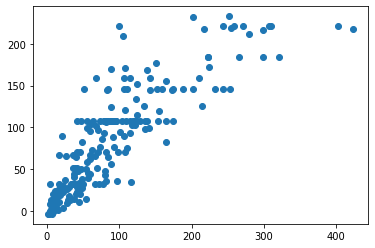

In [11]:
#modelo linear!!
plt.scatter(y_test,predictions)

In [12]:
print(lm.coef_)


[0.42070119]


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   
df

,Actual,Predicted
302,31,17.606751
58,215,124.885554
83,59,43.690225
555,15,24.758671
107,80,47.055834
...,...,...
533,42,22.234464
69,223,183.783720
328,81,106.795403
237,19,29.807086


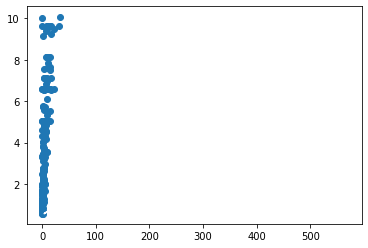

In [44]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes
m_X = players[['minutes']]
m_y = players['tackles']

X_train, X_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.35, random_state=101)
lm_tackles = LinearRegression()

lm_tackles.fit(X_train,y_train)
predictions = lm_tackles.predict(X_test)
#plot real vs prediccion.. el modelo
plt.scatter(y_test,predictions)
plt.plot(X_test, predictions, 'w')

[0.01689328]


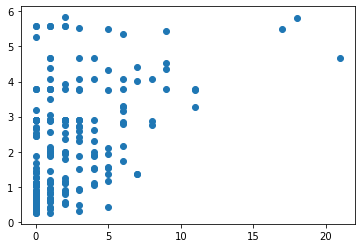

In [19]:
print(lm_tackles.coef_)

m_X = players[['minutes']]
m_y = players['shots']

X_train, X_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.35, random_state=101)
lm_shots = LinearRegression()

lm_shots.fit(X_train,y_train)
predictions = lm_shots.predict(X_test)
plt.scatter(y_test,predictions)

[0.00995149]


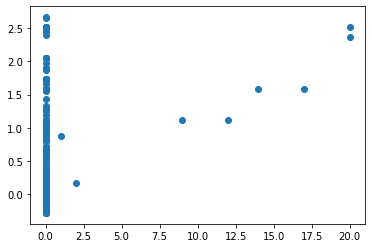

In [20]:
print(lm_shots.coef_)

m_X = players[['minutes']]
m_y = players['saves']

X_train, X_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.35, random_state=101)
lm_saves = LinearRegression()

lm_saves.fit(X_train,y_train)
predictions = lm_saves.predict(X_test)
plt.scatter(y_test,predictions)

(58, 9)
(19, 9)
(20, 9)


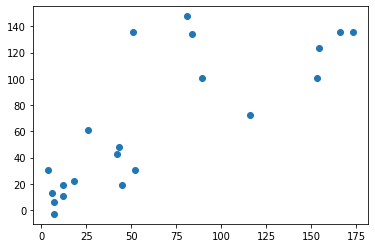

In [32]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
df_3teams = players.loc[(players['team'] == 'Greece') | (players['team'] == 'USA')  | (players['team'] == 'Portugal')]
print(df_3teams.shape)

df_usa = players.loc[players['team'] == 'USA']
print(df_usa.shape)

df_portugal = players.loc[players['team'] == 'Portugal']
print(df_portugal.shape)


m_X = df_3teams[['minutes']]
m_y = df_3teams['passes']

X_train, X_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.35, random_state=101)

lm_3tems = LinearRegression()

lm_3tems.fit(X_train,y_train)
predictions = lm_3tems.predict(X_test)
plt.scatter(y_test,predictions)
  

,Actual,Predicted
407,7,-2.989049
227,153,100.773081
580,12,10.323828
413,51,136.013049
212,12,18.938042
411,45,19.329598
419,52,30.293143
586,116,72.581106
582,42,42.431355
229,89,100.773081


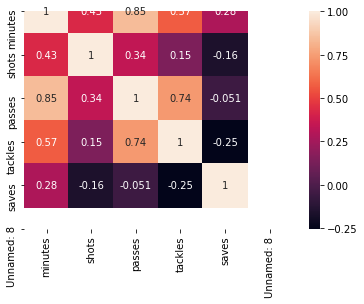

In [38]:
correlation_matrix = df_3teams.corr()
sns.heatmap(data=correlation_matrix, annot=True)

df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) 
df

In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.

##hint = df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]